# Laboratorium 2


### Konfiguracja

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import matplotlib.colors as mcolors
from copy import deepcopy
from matplotlib.widgets import Button
import json as js

class _Button_callback(object):
    def __init__(self, scenes):
        self.i = 0
        self.scenes = scenes

    def set_axis(self, ax):
        self.ax = ax
        
    def next(self, event):
        self.i = (self.i + 1) % len(self.scenes)
        self.draw()

    def prev(self, event):
        self.i = (self.i - 1) % len(self.scenes)
        self.draw()
        
    def draw(self):
        self.ax.clear()
        for collection in self.scenes[self.i].points:
            if len(collection.points) > 0:
                self.ax.scatter(*zip(*(np.array(collection.points))), c=collection.color, marker=collection.marker)
        for collection in self.scenes[self.i].lines:
            self.ax.add_collection(collection.get_collection())
        self.ax.autoscale()
        plt.draw()

### Interfejsy

[Dostępne kolory](https://matplotlib.org/3.1.1/gallery/color/named_colors.html)

[Dostępne znaczniki punktów](https://matplotlib.org/3.1.1/api/markers_api.html#module-matplotlib.markers)

In [2]:
class Scene:
    def __init__(self, points=[], lines=[]):
        self.points=points
        self.lines=lines

class PointsCollection:
    def __init__(self, points = [], color = None, marker = None):
        self.points = np.array(points)
        self.color = color
        self.marker = marker

class LinesCollection:
    def __init__(self, lines = [], color = None):
        self.color = color
        self.lines = deepcopy(lines)
        
    def add(self, line):
        self.lines.append(line)
        
    def get_collection(self):
        if self.color:
            return mcoll.LineCollection(self.lines, colors=mcolors.to_rgba(self.color))
        else:
            return mcoll.LineCollection(self.lines)
            


class Plot:
    def __init__(self, scenes = [], json = None):
        if json is None:
            self.scenes = scenes
        else:
            self.scenes = [Scene([PointsCollection(pointsCol) for pointsCol in scene["points"]], 
                                 [LinesCollection(linesCol) for linesCol in scene["lines"]]) 
                           for scene in js.loads(json)]
        
    def __configure_buttons(self, callback):
        plt.subplots_adjust(bottom=0.2)
        axprev = plt.axes([0.6, 0.05, 0.15, 0.075])
        axnext = plt.axes([0.76, 0.05, 0.15, 0.075])
        bnext = Button(axnext, 'Następny')
        bnext.on_clicked(callback.next)
        bprev = Button(axprev, 'Poprzedni')
        bprev.on_clicked(callback.prev)
        return [bprev, bnext]

    def draw(self):
        plt.close()
        callback = _Button_callback(self.scenes)
        self.widgets = self.__configure_buttons(callback)
        callback.set_axis(plt.axes())
        plt.show()
        callback.draw()
        
    def toJSON(self):
        return js.dumps([{"points": [pointCol.points.tolist() for pointCol in scene.points], 
                          "lines":[linesCol.lines for linesCol in scene.lines]} 
                         for scene in self.scenes])
    

### Przykład użycia

<IPython.core.display.Javascript object>


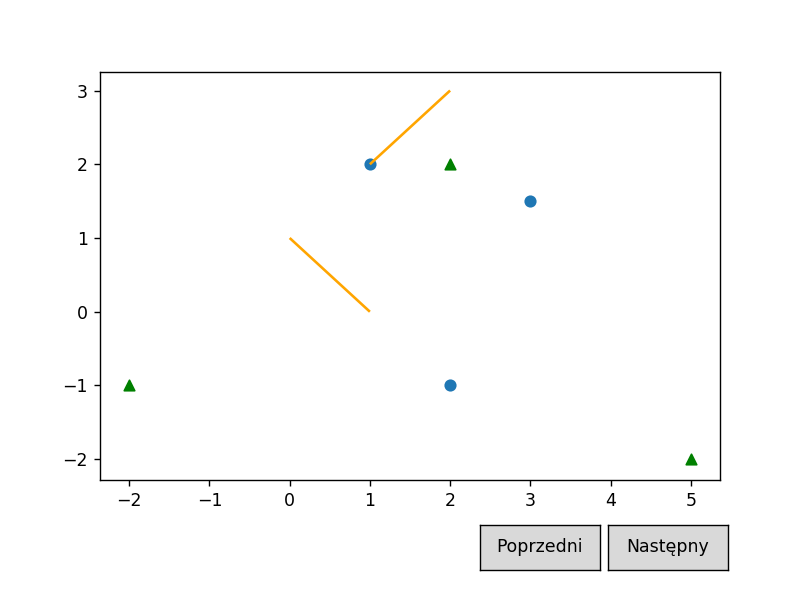

In [3]:
%matplotlib notebook

scenes3=[Scene([PointsCollection([(1, 2), (3, 1.5), (2, -1)]), 
               PointsCollection([(5, -2), (2, 2), (-2, -1)], 'green', marker = "^")], 
              [LinesCollection([[(1,2),(2,3)], [(0,1),(1,0)]], 'orange')]), 
        Scene([PointsCollection([(1, 2), (-15, 1.5), (2, -1)], 'red'), 
               PointsCollection([(5, -2), (2, 2), (-2, 1)],'green')], 
              [LinesCollection([[(-1,2),(-2,3)], [(0,-1),(-1,0)]])])]

plot = Plot(scenes3)
plot.draw() 


### Rozwiązanie

In [4]:
from math import pi,cos,sin,sqrt
from random import seed,random
import time

print("Rozwiązanie punktu 1: ")
print("Pierwszy zbiór: ")

Rozwiązanie punktu 1: 
Pierwszy zbiór: 


In [5]:
def randomFirst():
    points = []
    seed(1)
    for i in range(0,100):
        points.append((-100+random()*200,-100+random()*200))
    return points

In [6]:
print("Drugi zbiór: ")

Drugi zbiór: 


In [7]:
def randomSecond():
    points = []
    seed(1)
    for i in range(0,100):
        angle = 2*pi*random()
        points.append((cos(angle)*10,sin(angle)*10))
    return points

In [8]:
print("Trzeci zbiór: ")

Trzeci zbiór: 


In [106]:
def findPoint(a,b,length):
    side = sqrt((b[0]-a[0])**2+(b[1]-a[1])**2)
    v = ((b[0]-a[0])/side,(b[1]-a[1])/side)
    result = (a[0]+length*v[0],a[1]+length*v[1])
    return result

def randomThird():
    a=(-10,-10)
    b=(10,-10)
    c=(10,10)
    d=(-10,10)
    points = []
    seed(1)
    side1 = sqrt((b[0]-a[0])**2+(b[1]-a[1])**2)
    side2 = sqrt((c[0]-b[0])**2+(c[1]-b[1])**2)
    perimeter = 2*side1+2*side2
    for i in range(0,100):
        tmp=random()*perimeter
        if (tmp<side1):
            (x,y)=findPoint(a,b,tmp)
        elif(tmp>side1 and tmp<side1+side2):
            (x,y)=findPoint(b,c,tmp%side1)
        elif(tmp>side1+side2 and tmp<side1*2+side2):
            (x,y)=findPoint(c,d,tmp%(side1+side2))
        else:
            (x,y)=findPoint(d,a,tmp%(2*side1+side2))
        points.append((x,y))
    return points

In [10]:
print("Czwarty zbiór: ")

Czwarty zbiór: 


In [11]:
def randomFourth(): 
    a=(0,0)
    b=(10,0)
    c=(10,10)
    d=(0,10)
    points = [a,b,c,d]
    seed(1)
    side = sqrt((b[0]-a[0])**2+(b[1]-a[1])**2)
    for i in range(0,25):
        tmp=random()*2*side
        if (tmp<side):
            (x,y)=findPoint(d,a,tmp)
        else:
            (x,y)=findPoint(a,b,tmp%side)
        points.append((x,y))
    diagonal = sqrt((c[0]-a[0])**2+(c[1]-a[1])**2)
    for i in range(0,20):
        tmp=random()*2*diagonal
        if (tmp<diagonal):
            (x,y)=findPoint(a,c,tmp)
        else:
            (x,y)=findPoint(d,b,tmp%diagonal)
        points.append((x,y))
    return points


In [12]:
print("Rozwiązanie punktu 2: ")

Rozwiązanie punktu 2: 


In [107]:
points1 = randomFirst()
points2 = randomSecond()
points3 = randomThird()
points4 = randomFourth()

<IPython.core.display.Javascript object>


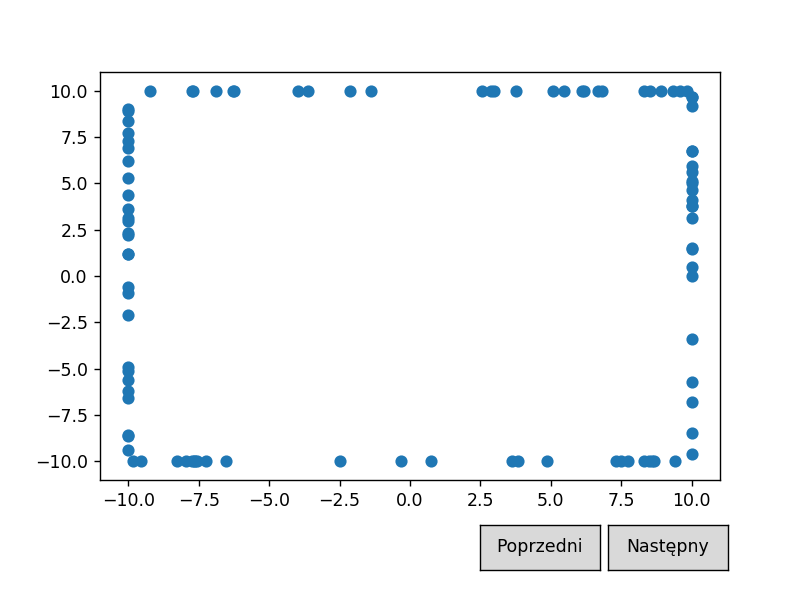

In [108]:
%matplotlib notebook

scenes=[Scene([PointsCollection(points1)]),
        Scene([PointsCollection(points2)]),
        Scene([PointsCollection(points3)]),
        Scene([PointsCollection(points4)])]
        
plot = Plot(scenes)
plot.draw() 

In [15]:
print("Rozwiązanie punktu 3: ")
print("Pierwszy zbiór: ")

Rozwiązanie punktu 3: 
Pierwszy zbiór: 


In [15]:
def randomFirstExtra(n, left, right):
    points = []
    seed(1)
    for i in range(0,n):
        points.append((left+random()*(right-left),left+random()*(right-left)))
    return points

In [16]:
print("Drugi zbiór: ")

Drugi zbiór: 


In [17]:
def randomSecondExtra(n, radius, x, y):
    points = []
    seed(1)
    for i in range(0,n):
        angle = 2*pi*random()
        points.append((cos(angle)*radius+x,sin(angle)*radius+y))
    return points

In [97]:
print("Trzeci zbiór:")

Trzeci zbiór:


In [19]:
def findPoint(a,b,length):
    side = sqrt((b[0]-a[0])**2+(b[1]-a[1])**2)
    v = ((b[0]-a[0])/side,(b[1]-a[1])/side)
    result = (a[0]+length*v[0],a[1]+length*v[1])
    return result

def randomThirdExtra(n,a,b,c,d):
    points = []
    seed(1)
    side1 = sqrt((b[0]-a[0])**2+(b[1]-a[1])**2)
    side2 = sqrt((c[0]-b[0])**2+(c[1]-b[1])**2)
    perimeter = 2*side1+2*side2
    for i in range(0,n):
        tmp=random()*perimeter
        if (tmp<side1):
            (x,y)=findPoint(a,b,tmp)
        elif(tmp>side1 and tmp<side1+side2):
            (x,y)=findPoint(b,c,tmp%side1)
        elif(tmp>side1+side2 and tmp<side1*2+side2):
            (x,y)=findPoint(c,d,tmp%(side1+side2))
        else:
            (x,y)=findPoint(d,a,tmp%(2*side1+side2))
        points.append((x,y))
    return points


In [20]:
print("Czwarty zbiór: ")

Czwarty zbiór: 


In [21]:
def randomFourthExtra(n1,n2,a,b,c,d):           # lets say there are points on left and bottom sides, mpay not include axes
    points = [a,b,c,d]
    seed(1)
    side = sqrt((b[0]-a[0])**2+(b[1]-a[1])**2)
    for i in range(0,n1):
        tmp=random()*2*side
        if (tmp<side):
            (x,y)=findPoint(d,a,tmp)
        else:
            (x,y)=findPoint(a,b,tmp%side)
        points.append((x,y))
    diagonal = sqrt((c[0]-a[0])**2+(c[1]-a[1])**2)
    for i in range(0,n2):
        tmp=random()*2*diagonal
        if (tmp<diagonal):
            (x,y)=findPoint(a,c,tmp)
        else:
            (x,y)=findPoint(d,b,tmp%diagonal)
        points.append((x,y))
    return points


In [22]:
print("Oraz ich przykładowa wizualizacja: ")

Oraz ich przykładowa wizualizacja: 


In [93]:
points5 = randomFirstExtra(1000,-250,500)
points6 = randomSecondExtra(1000, 100, 2, 5)
points7 = randomThirdExtra(10000, (0,0), (10,0), (10,10), (0,10))
points8 = randomFourthExtra(1000, 1000, (1,1), (4,1), (4,4), (1,4))

<IPython.core.display.Javascript object>


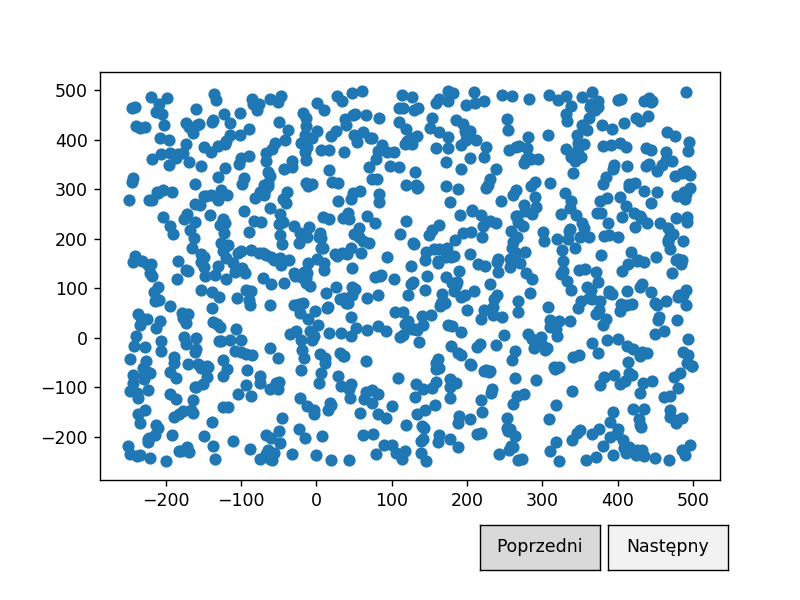

In [94]:
%matplotlib notebook

scenes2=[Scene([PointsCollection(points5)]),
        Scene([PointsCollection(points6)]),
        Scene([PointsCollection(points7)]),
        Scene([PointsCollection(points8)])]
        
plot = Plot(scenes2)
plot.draw() 

In [26]:
print("Rozwiązanie punktu 4: ")

Rozwiązanie punktu 4: 


In [25]:
print("Algorytm Jarvisa: ")

Algorytm Jarvisa: 


In [71]:
def firstPoint(points):
    min=0
    for i in range(0,len(points)):
        if(points[i][1]<points[min][1]):
            min=i
        elif (points[i][1]==points[min][1]):
            if(points[i][0]<points[min][0]):
                min=i
    return min

def orientation(a,b,c):
    det = ((b[1]-a[1])*(c[0]-b[0])-(b[0]-a[0])*(c[1]-b[1]))
    if det==0:
        return 0
    elif det>0:
        return 1
    else:
        return -1              # 0 - colinear, 1 - clockwise, -1 - counterclockwise

def dist(a,b):
    return sqrt((b[0]-a[0])**2+(b[1]-a[1])**2)

def Jarvis(points):
    time1 = time.time()
    if len(points) < 3:
        return []
    first = firstPoint(points)
    convex = []
    stepsJ = []
    a = first
    while(True):
        convex.append(points[a])
        stepsJ.append(Scene([PointsCollection(points)],[LinesCollection([convex], color='red')]))
        b = (a+1) % len(points)
        for i in range(len(points)):
            orient = orientation(points[a],points[i],points[b])
            if orient==-1 or (orient==0 and dist(points[a],points[i])>dist(points[a],points[b])):
                stepsJ.append(Scene([PointsCollection(points)],[LinesCollection([convex],color='red'),
                                LinesCollection([[points[a],points[i]]],color='green')]))
                b = i
        a = b
        if a==first:
            convex.append(points[a])
            break
    stepsJ.append(Scene([PointsCollection(points),PointsCollection(convex,'orange')],[LinesCollection([convex], color='red')]))    
    time2 = time.time()
    print("It took ", time2-time1, "s time to find hull convex")
    print("The convex consists of points: " , convex)
    print("\n")
    return (convex,stepsJ)

In [72]:
print("Przykład działania: ")

Przykład działania: 


It took  0.004014253616333008 s time to find hull convex
The convex consists of points:  [(52.4560164915884, -99.57878932977786), (91.42325629204538, -98.85817410992142), (96.6375434619348, 18.63674607601152), (98.50868243521302, 71.98930575905797), (73.55621288699868, 94.75504723193833), (0.4477116866966213, 96.41532750770685), (-55.880050395464686, 95.11890356357668), (-88.77534049585192, 74.00203103532797), (-94.91082780130785, 8.282494558699312), (-96.66187397688807, -97.08800501503754), (-49.52837954403293, -98.30394750726623), (52.4560164915884, -99.57878932977786)]




<IPython.core.display.Javascript object>


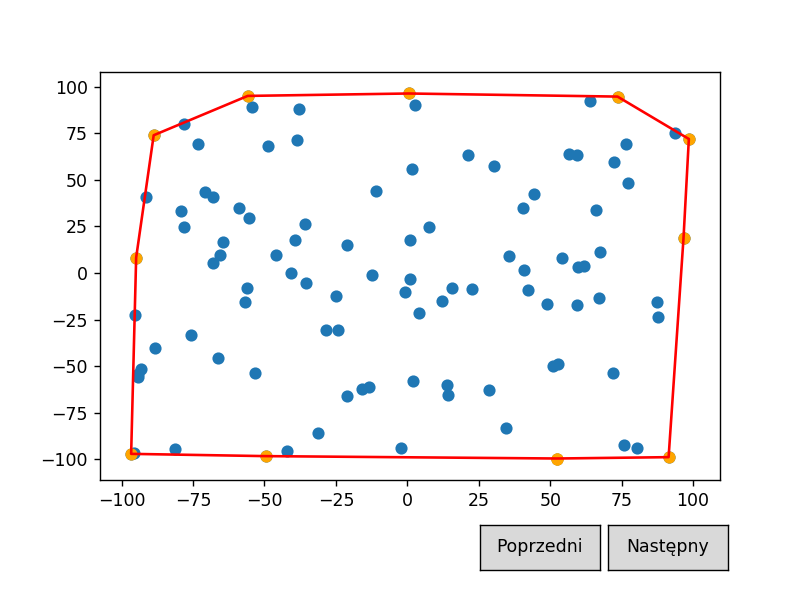

In [73]:
convex1,steps1 = Jarvis(points1)
%matplotlib notebook
jarvisScenes = Plot(steps1)
jarvisScenes.draw()

In [123]:
convex2,steps2 = Jarvis(points2)
convex3,steps3 = Jarvis(points3)
convex4,steps4 = Jarvis(points4)
convex5,steps5 = Jarvis(points5)
convex6,steps6 = Jarvis(points6)
convex7,steps7 = Jarvis(points7)
convex8,steps8 = Jarvis(points8)

It took  0.10475611686706543 s time to find hull convex
The convex consists of points:  [(-0.5963342237447402, -9.98220343880001), (0.77081498170093, -9.970247953987172), (0.8644047343811254, -9.962570173162119), (1.2859361626975527, -9.91697374129158), (1.777604836048933, -9.84073783040964), (2.0988961942205915, -9.777250879766067), (2.409125560894237, -9.70546825412592), (2.9346523795619834, -9.559697453953822), (3.630945386819669, -9.317523039839127), (4.285398074294634, -9.03522901452043), (4.819501890554773, -8.761986163361534), (5.13173354129309, -8.582849810008765), (5.229162407069159, -8.523840714167218), (5.682900359339193, -8.228283144485395), (5.7466457122538985, -8.183890459789518), (6.371650848392733, -7.707273542970703), (6.388258325837678, -7.693513863142485), (7.395422901494754, -6.731100958093474), (7.549917521551657, -6.557342862605805), (8.142562187705012, -5.805056504406875), (9.213117551452008, -3.8882470321633322), (9.277952270268065, -3.730898239114498), (9.41455

It took  0.28324246406555176 s time to find hull convex
The convex consists of points:  [(0.008868234189227664, 0.0), (9.99634186247819, 0.0), (10.0, 0.0164853152134814), (10.0, 9.995011388020735), (9.999563419742628, 10.0), (0.0010057034055535041, 10.0), (0.0, 9.990359585238124), (0.0, 0.0025622024363798346), (0.008868234189227664, 0.0)]


It took  0.01196742057800293 s time to find hull convex
The convex consists of points:  [(1, 1), (4, 1), (4, 4), (1, 4), (1, 1)]




In [30]:
print("KONTYNUACJA ĆWICZENIA W DOMU: ")

KONTYNUACJA ĆWICZENIA W DOMU: 


In [31]:
print("Algorytm Grahama: ")

Algorytm Grahama: 


In [111]:
def orientation2(a,b,c):
    det = ((b[1]-a[1])*(c[0]-b[0])-(b[0]-a[0])*(c[1]-b[1]))
    if det==0:
        if dist2(a,b)<dist2(a,c):
            return 1
        else:
            return -1
    elif det>0:
        return 1
    else:
        return -1              # 1 - clockwise, -1 - counterclockwise

def dist2(a,b):
    return sqrt((b[0]-a[0])**2+(b[1]-a[1])**2)

def slope(a,b):
    return 1.0*(b[0]-a[0])/(b[1]-a[1]) if b[1]!=a[1] else float('inf')

def Graham(points):
    time1 = time.time()
    if len(points) < 3:
        return []
    first=firstPoint(points)
    points[0],points[first]=points[first],points[0]
    tmpPoints = []
    sortedPoints = []
    for p in points:
        tmpPoints.append((p[0],p[1],slope(points[0],p),dist2(points[0],p)))
    tmpPoints[1:]=sorted(tmpPoints[1:],key=lambda t:t[3])      
    tmpPoints[1:]=sorted(tmpPoints[1:],key=lambda t:t[2], reverse=True) 
    for p in tmpPoints:
        sortedPoints.append((p[0],p[1]))
    stack = []
    stack.append(sortedPoints[0])
    stack.append(sortedPoints[1])
    stepsG = [Scene([PointsCollection(sortedPoints)])]
    for p in sortedPoints[2:]:
        while(len(stack)>1 and orientation(stack[-2],stack[-1],p) != -1):
            stepsG.append(Scene([PointsCollection(sortedPoints)],[LinesCollection([stack],color='red'),
                                LinesCollection([[stack[-2],stack[-1],p]],color='green')]))
            stack.pop(-1)
        if(len(stack)>1):
            stepsG.append(Scene([PointsCollection(sortedPoints)],[LinesCollection([stack],color='red'),
                                LinesCollection([[stack[-2],stack[-1],p]],color='green')]))
        stack.append(p)
    stack.append(points[0])
    stepsG.append(Scene([PointsCollection(sortedPoints)],[LinesCollection([stack],color='red'),
                                LinesCollection([[stack[-3],stack[-2],stack[-1]]],color='green')]))
    stepsG.append(Scene([PointsCollection(sortedPoints),PointsCollection(stack,'orange')],[LinesCollection([stack],color='red')]))
    time2 = time.time()
    print("It took ", time2-time1, "s time to find hull convex")
    print("The convex consists of points: " , stack)
    print("\n")
    return (stack, stepsG)

In [112]:
print("Przykład działania: ")

Przykład działania: 


It took  0.014002799987792969 s time to find hull convex
The convex consists of points:  [(52.4560164915884, -99.57878932977786), (91.42325629204538, -98.85817410992142), (96.6375434619348, 18.63674607601152), (98.50868243521302, 71.98930575905797), (73.55621288699868, 94.75504723193833), (0.4477116866966213, 96.41532750770685), (-55.880050395464686, 95.11890356357668), (-88.77534049585192, 74.00203103532797), (-94.91082780130785, 8.282494558699312), (-96.66187397688807, -97.08800501503754), (-49.52837954403293, -98.30394750726623), (52.4560164915884, -99.57878932977786)]




<IPython.core.display.Javascript object>


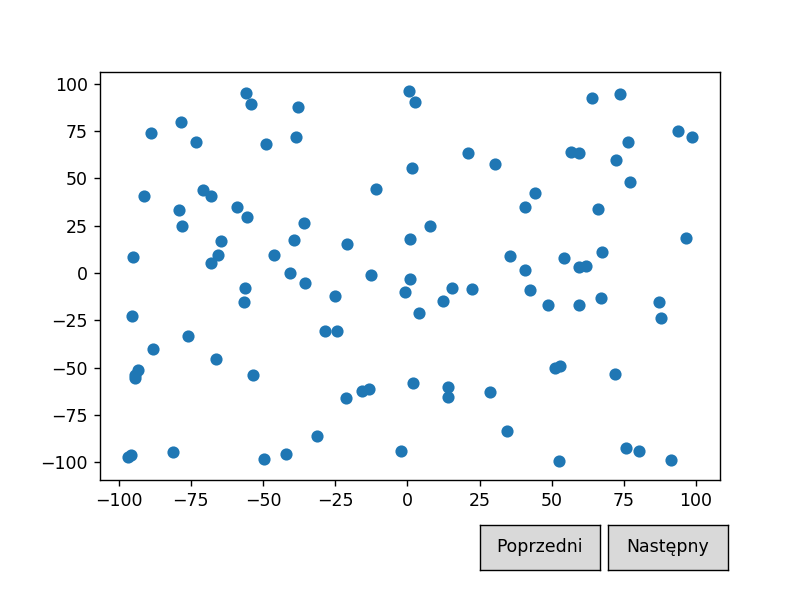

In [113]:
(convex9,steps9) = Graham(points1)
%matplotlib notebook
grahamScenes = Plot(steps9)
grahamScenes.draw()

In [114]:
(convex10,steps10) = Graham(points2)
(convex11,steps11) = Graham(points3)
(convex12,steps12) = Graham(points4)
(convex13,steps13) = Graham(points5)
(convex14,steps14) = Graham(points6)
(convex15,steps15) = Graham(points7)
(convex16,steps16) = Graham(points8)

It took  0.021941423416137695 s time to find hull convex
The convex consists of points:  [(-0.5963342237447402, -9.98220343880001), (0.77081498170093, -9.970247953987172), (0.8644047343811254, -9.962570173162119), (1.2859361626975527, -9.91697374129158), (1.777604836048933, -9.84073783040964), (2.0988961942205915, -9.777250879766067), (2.409125560894237, -9.70546825412592), (2.9346523795619834, -9.559697453953822), (3.630945386819669, -9.317523039839127), (4.285398074294634, -9.03522901452043), (4.819501890554773, -8.761986163361534), (5.13173354129309, -8.582849810008765), (5.229162407069159, -8.523840714167218), (5.682900359339193, -8.228283144485395), (5.7466457122538985, -8.183890459789518), (6.371650848392733, -7.707273542970703), (6.388258325837678, -7.693513863142485), (7.395422901494754, -6.731100958093474), (7.549917521551657, -6.557342862605805), (8.142562187705012, -5.805056504406875), (9.213117551452008, -3.8882470321633322), (9.277952270268065, -3.730898239114498), (9.4145

It took  59.19614887237549 s time to find hull convex
The convex consists of points:  [(0.008868234189227664, 0.0), (9.99634186247819, 0.0), (10.0, 0.0164853152134814), (10.0, 9.995011388020735), (9.999563419742628, 10.0), (0.0010057034055535041, 10.0), (0.0, 9.990359585238124), (0.0, 0.0025622024363798346), (0.008868234189227664, 0.0)]


It took  2.2051022052764893 s time to find hull convex
The convex consists of points:  [(1, 1), (4, 1), (4, 4), (1, 4), (1, 1)]


